<center>

# Curve Fitting: A Simple Aproach Of Curve Fitting And Regression With Statitical Methods And Deep Learning

</center>

## Importing The Libraries

In [1]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import matplotlib.colors as mcolors
print(mcolors.CSS4_COLORS.keys())
dpi = 200

linear_colors = ["#a8dadc", "#457b9d", "#1d3557", "#e63946"]
parabolic_colors = ["#d2f5e3", "#52b788", "#1b4332", "#ffba08"]
exponential_colors = ["#ffe5b4", "#f4a261", "#e76f51", "#264653"]
sinusoidal_colors = ["#e0bbff", "#9d4edd", "#5a189a", "#4cc9f0"]


dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

## Data Importing And Analysis

<center>

| Curve Type      | Modify $y$ as               | Example                       |
| --------------- | --------------------------- | ----------------------------- |
| **Linear**      | y = a.X +b                  | default                       |
| **Quadratic**   | y = a·X² + b·X + c          | parabola                      |
| **Exponential** | y = a·exp(b·X)              | Rapid rise                    |
| **Sine/Cosine** | y = a·sin(b·X + c)          | Periodic wave                 |

</center>

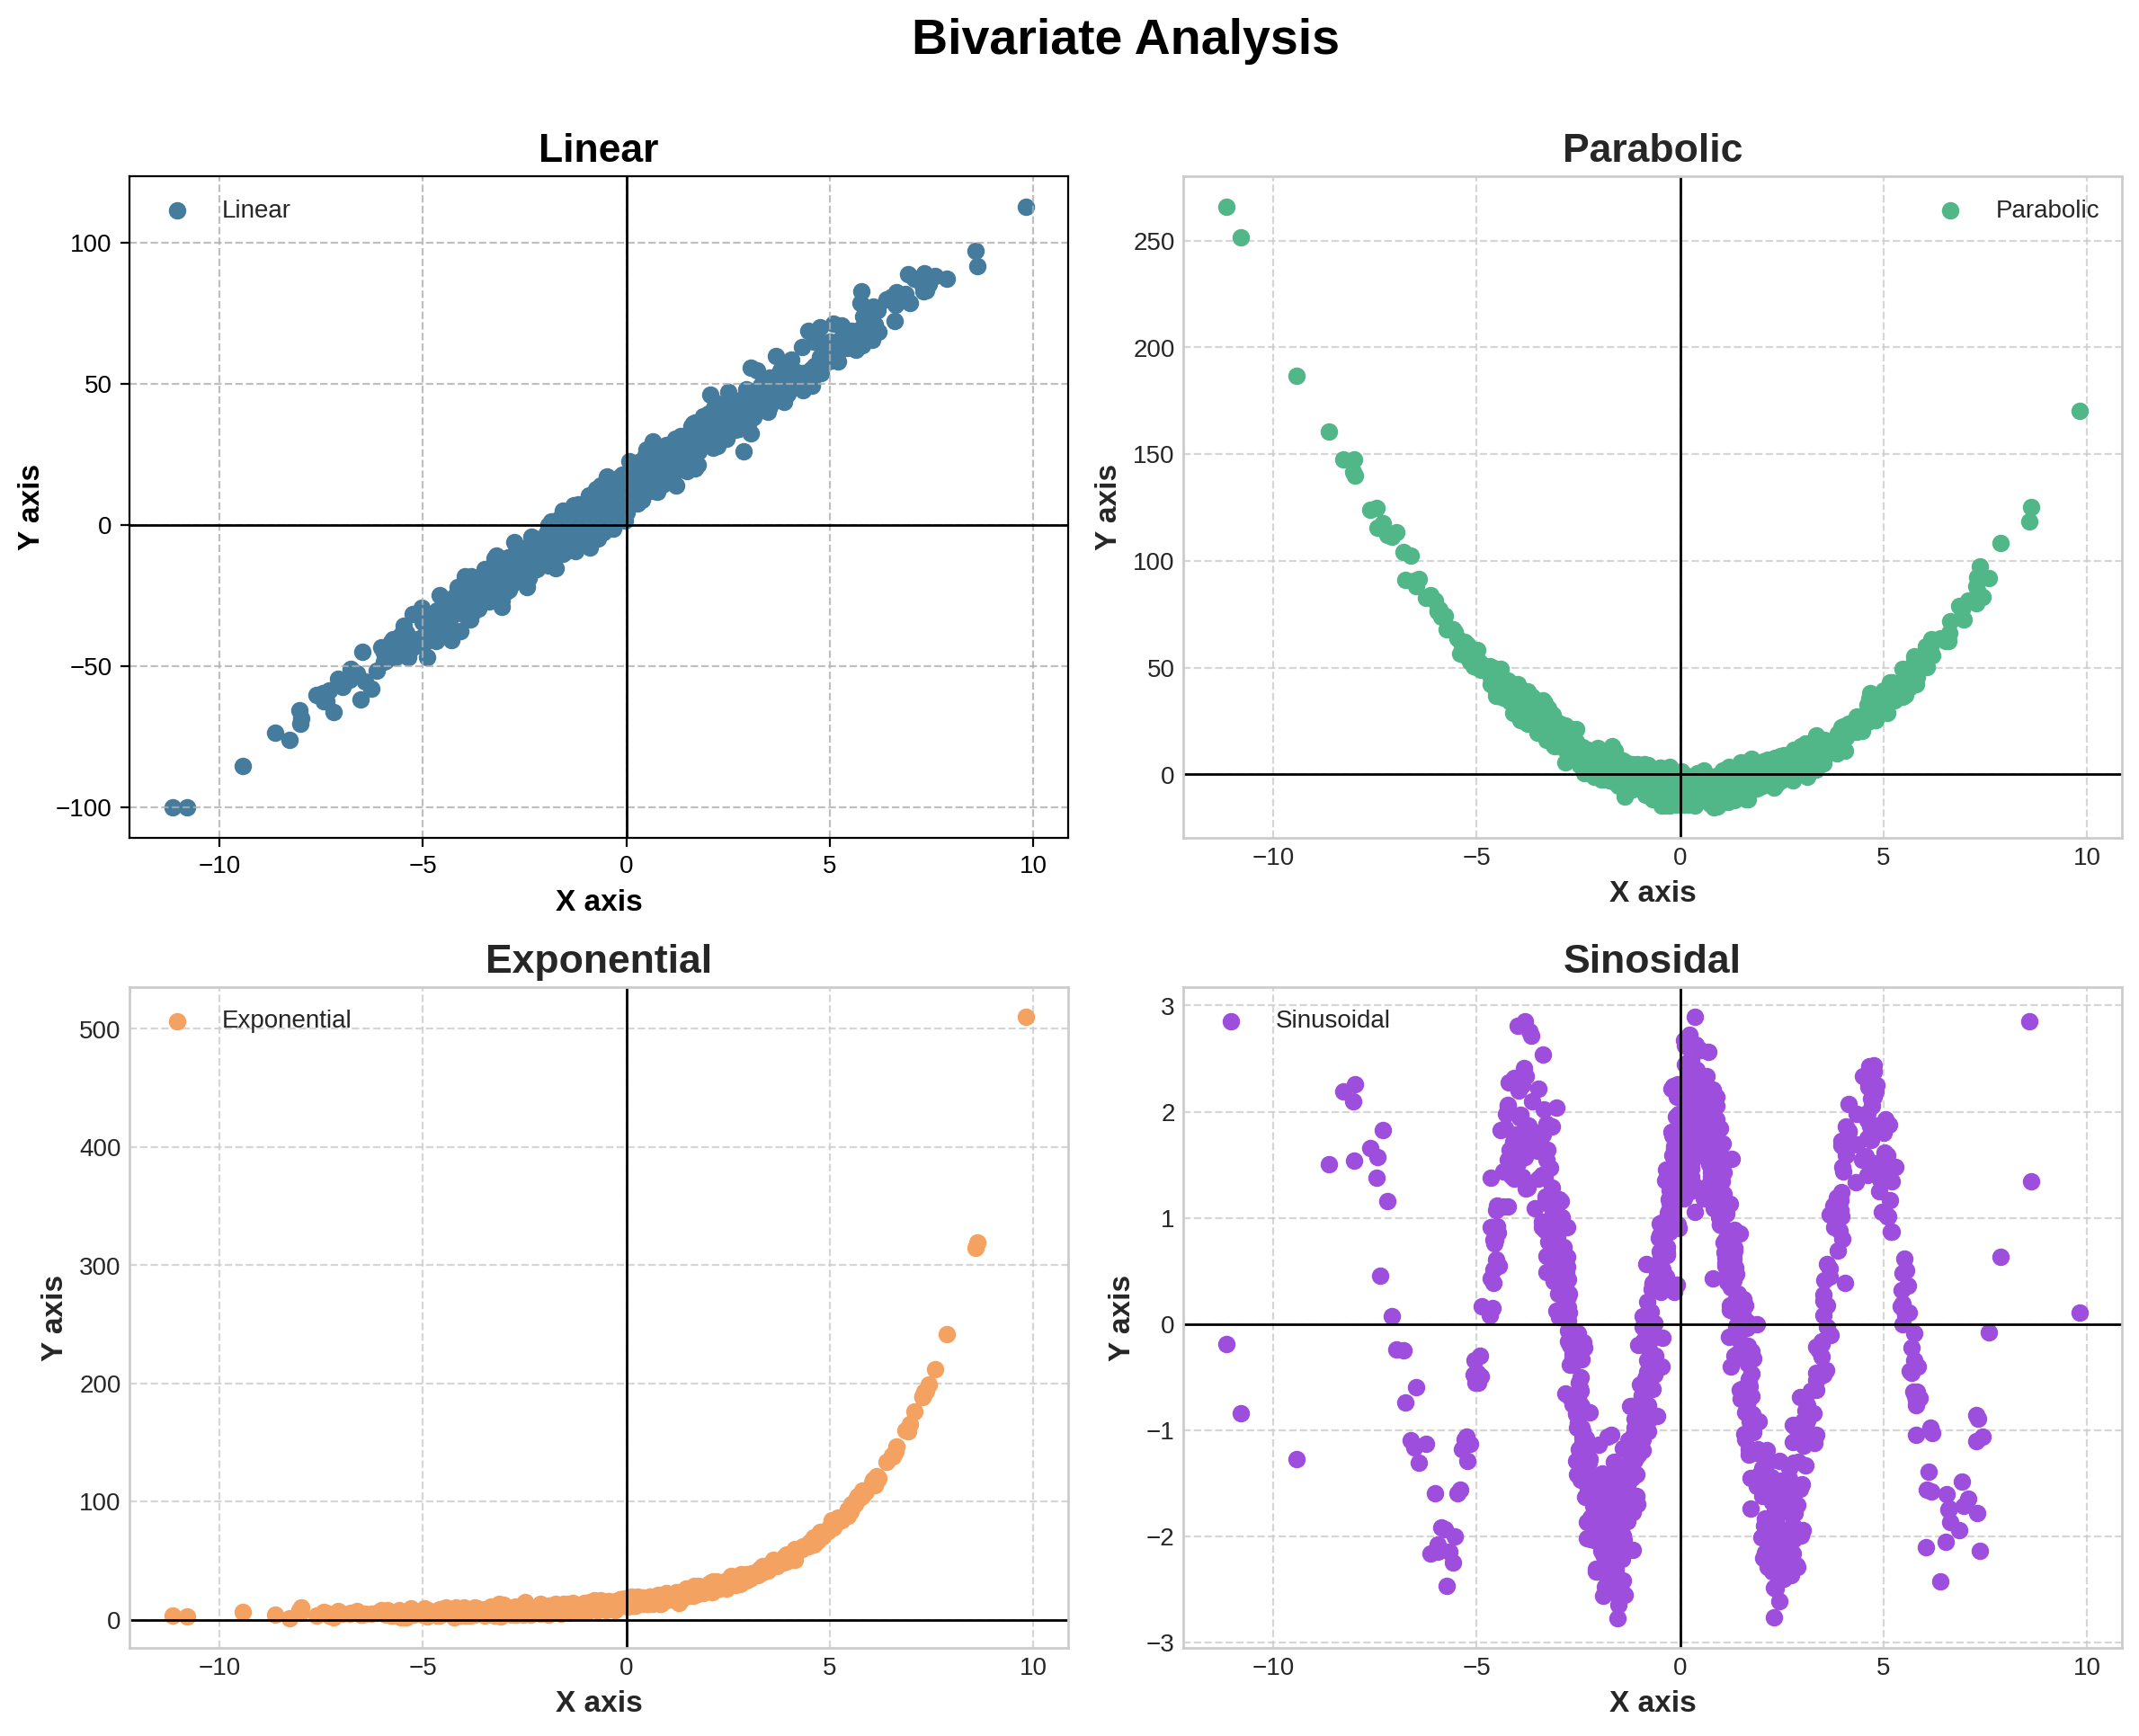

In [3]:
X = np.random.normal(0, 2, 1000)
X = X.flatten() * 1.5
X_global = X

linear_coeff = [10, 12]
parabolic_coeff = [2, -2 ,-6]
exponential_coeff = [10, 0.4]
sinosidal_coeff = [2, 1.5, 1]

def linear(x, noise):
    return linear_coeff[0] * x + linear_coeff[1] + np.random.normal(0, noise, size=X.shape)

def parabolic(x, noise):
    return parabolic_coeff[0] * x**2 + parabolic_coeff[1] * x + parabolic_coeff[2] + np.random.normal(0, noise, size=X.shape)

def exponential(x, noise):
    return exponential_coeff[0] * np.exp(exponential_coeff[1] * x) + np.random.normal(4, noise, size=X.shape)

def sinusoidal(x, noise):
    return sinosidal_coeff[0] * np.sin(sinosidal_coeff[1] * x + sinosidal_coeff[2]) + np.random.normal(0, noise, size=X.shape)

noise = 4

y_linear = linear(X, noise)
y_parabolic = parabolic(X, noise=4)
y_exponential = exponential(X, noise=2)
y_sinusoidal = sinusoidal(X, noise=0.4)

plt.figure(figsize=(12, 10), dpi=dpi)
plt.title("Bivariate Analysis\n\n", fontsize=20, weight="bold")
plt.grid(False)
plt.axis("off")


plt.subplot(2, 2, 1)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_linear, color=linear_colors[1], label='Linear')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Linear", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)



plt.subplot(2, 2, 2)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_parabolic, color=parabolic_colors[1], label='Parabolic')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Parabolic", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)


plt.subplot(2, 2, 3)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_exponential, color=exponential_colors[1], label='Exponential')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Exponential", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)


plt.subplot(2, 2, 4)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_sinusoidal, color=sinusoidal_colors[1], label='Sinusoidal')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Sinosidal", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)


plt.tight_layout()
plt.show()


### Important functions

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


## Linear Regression

Normal equations

### 📘 Normal Equations of Linear Regression Vectorised

In **multiple linear regression**, we model the relationship as:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$

Where:
- $\mathbf{y} \in \mathbb{R}^{n \times 1}$ is the **output vector**
- $\mathbf{X} \in \mathbb{R}^{n \times p}$ is the **design matrix**, with a column of ones for the intercept
- $\boldsymbol{\beta} \in \mathbb{R}^{p \times 1}$ is the **coefficient vector**
- $\boldsymbol{\varepsilon}$ is the **error term**


### 🎯 Objective

Minimize the **sum of squared errors**:

$$
J(\boldsymbol{\beta}) = \|\mathbf{y} - \mathbf{X} \boldsymbol{\beta}\|^2
$$


### 🧮 Derivation of Normal Equations

To minimize $J(\boldsymbol{\beta})$, take the derivative and set it to zero:

$$
\frac{\partial J}{\partial \boldsymbol{\beta}} = -2 \mathbf{X}^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) = 0
$$

Solving this gives the **normal equations**:

$$
\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} = \mathbf{X}^\top \mathbf{y}
$$


### ✅ Solution

If $\mathbf{X}^\top \mathbf{X}$ is invertible:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

This gives the **least squares estimate** of the regression coefficients.



In [5]:
DATA_linear = pd.DataFrame(np.column_stack([X_global, y_linear]), columns=["X", "Y_linear"])

Actual Values Of Coefficients :  [10, 12]


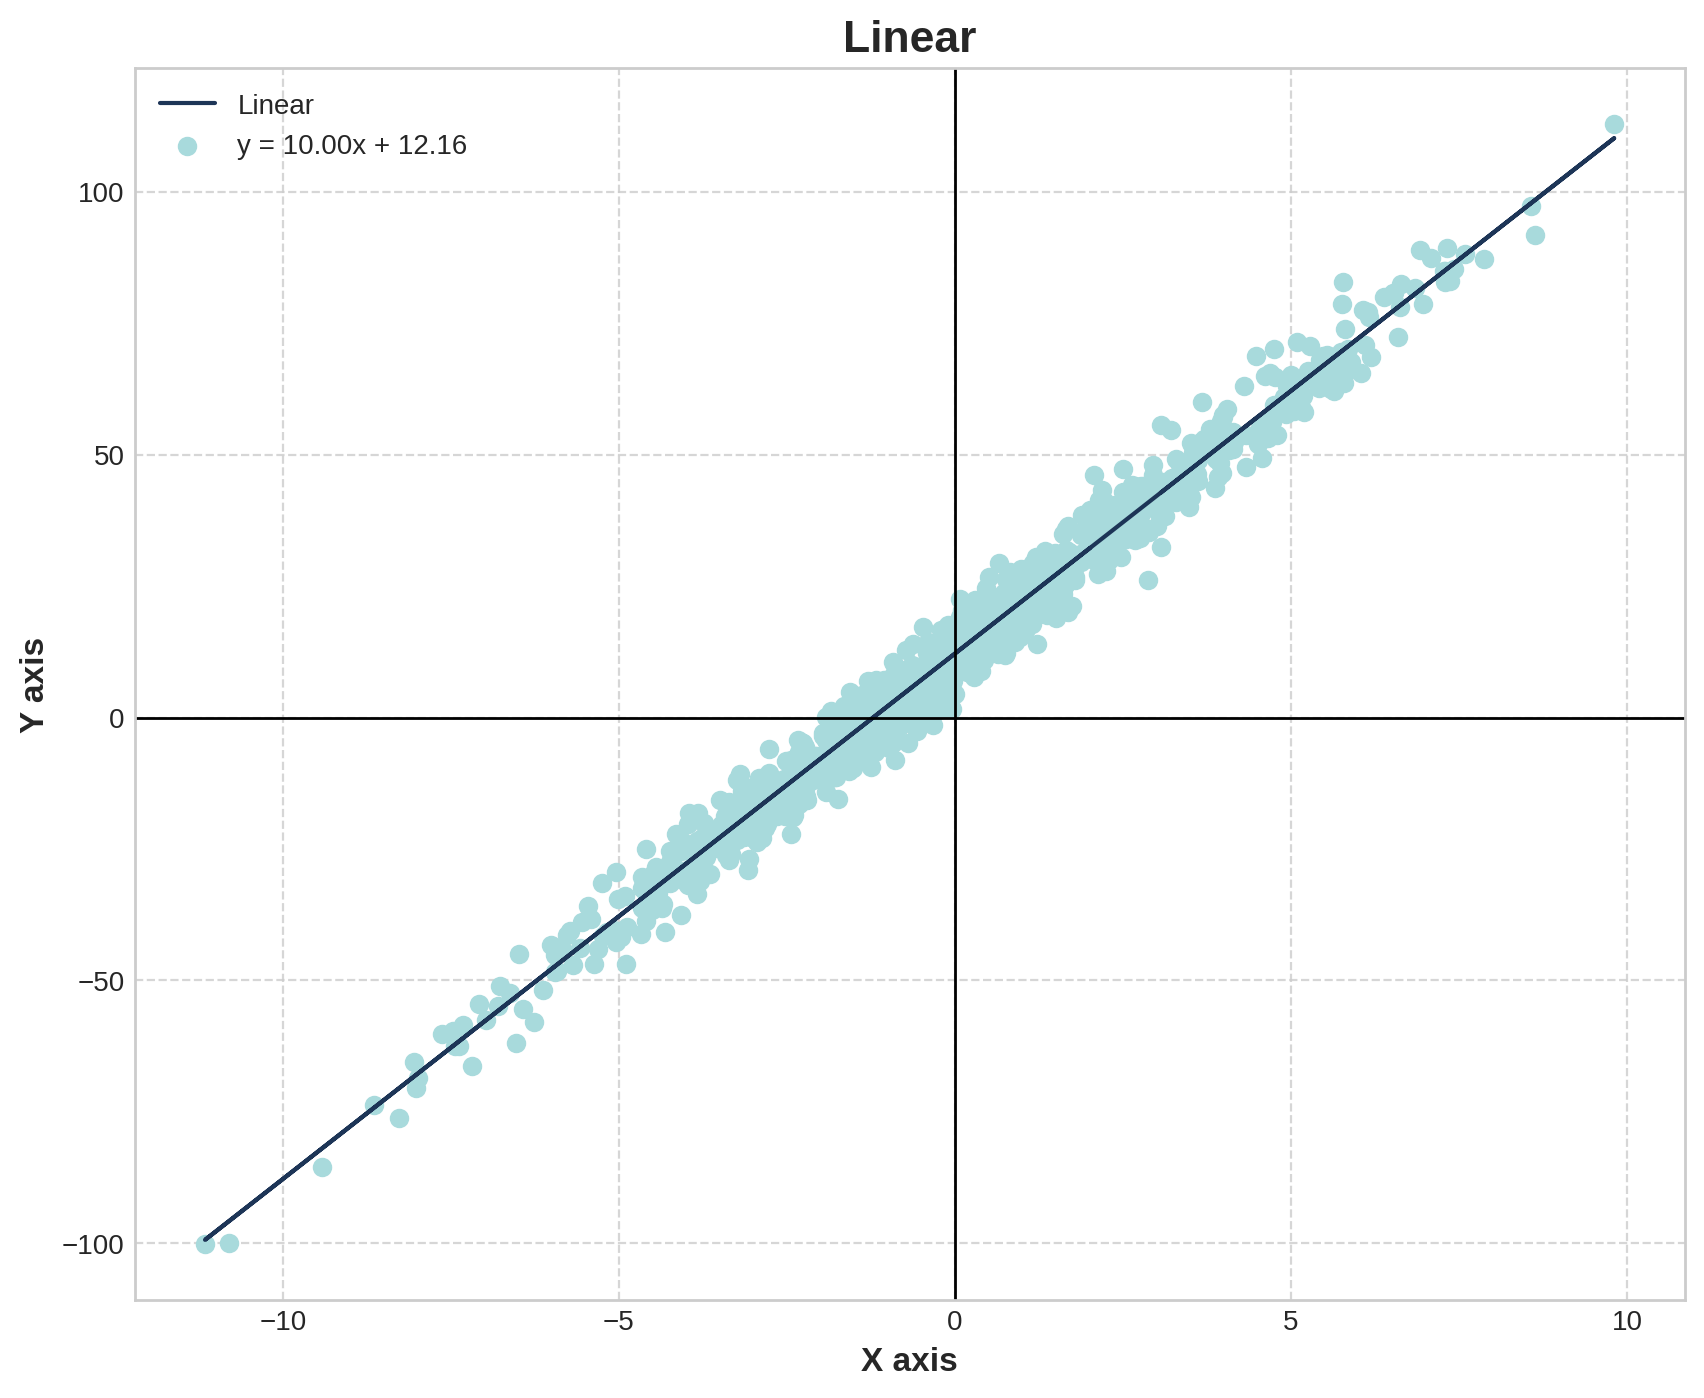

In [6]:
X_linear = np.array([[1, x] for x in DATA_linear["X"]])
X_t = np.transpose(X_linear)
coeffs = np.linalg.inv(np.matmul(X_t, X_linear))
coeffs = np.matmul(coeffs, X_t)
coeffs = np.matmul(coeffs, DATA_linear["Y_linear"])

y_stat_linear = np.matmul(X_linear, coeffs)

print("Actual Values Of Coefficients : ", linear_coeff)

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(X, y_stat_linear, color=linear_colors[2], label='Linear')
plt.scatter(X, y_linear, color=linear_colors[0], label=f"y = {coeffs[1]:.2f}x + {coeffs[0]:.2f}", alpha=1.0)
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Linear", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

### 📌 Linear Regression: Matrix Form vs Manual Equation

We want to fit a line of the form:

$$
y = a x + b
$$

### ✅ Matrix Form (Generalized)
The closed-form solution for linear regression using matrices is:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

Where:
- $\mathbf{X}$ is the **design matrix**, e.g., $\mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$
- $\boldsymbol{\beta} = \begin{bmatrix} b \\ a \end{bmatrix}$
- $\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$

### ✅ Manual Normal Equations (Summation Form)

This is equivalent to solving:

$$
\begin{bmatrix}
n & \sum x \\
\sum x & \sum x^2
\end{bmatrix}
\begin{bmatrix}
b \\
a
\end{bmatrix}
=
\begin{bmatrix}
\sum y \\
\sum x y
\end{bmatrix}
$$

Both methods give the same solution for $a$ and $b$, just expressed differently.


In [7]:
DATA_linear["X2"] = DATA_linear["X"]**2
DATA_linear["XY"] = DATA_linear["X"] * DATA_linear["Y_linear"]
DATA_linear

,X,Y_linear,X2,XY
0,2.012024,39.540596,4.048239,79.556610
1,-1.654429,-0.921010,2.737135,1.523746
2,4.043355,58.653504,16.348721,237.156950
3,-5.771356,-41.317091,33.308553,238.455650
4,5.278972,70.721545,27.867543,373.337041
...,...,...,...,...
995,1.108006,28.509653,1.227678,31.588878
996,1.763382,27.219721,3.109516,47.998766
997,0.434718,18.144129,0.188980,7.887579
998,-2.346388,-13.737206,5.505538,32.232819


Actual Values Of Coefficients :  [10, 12]


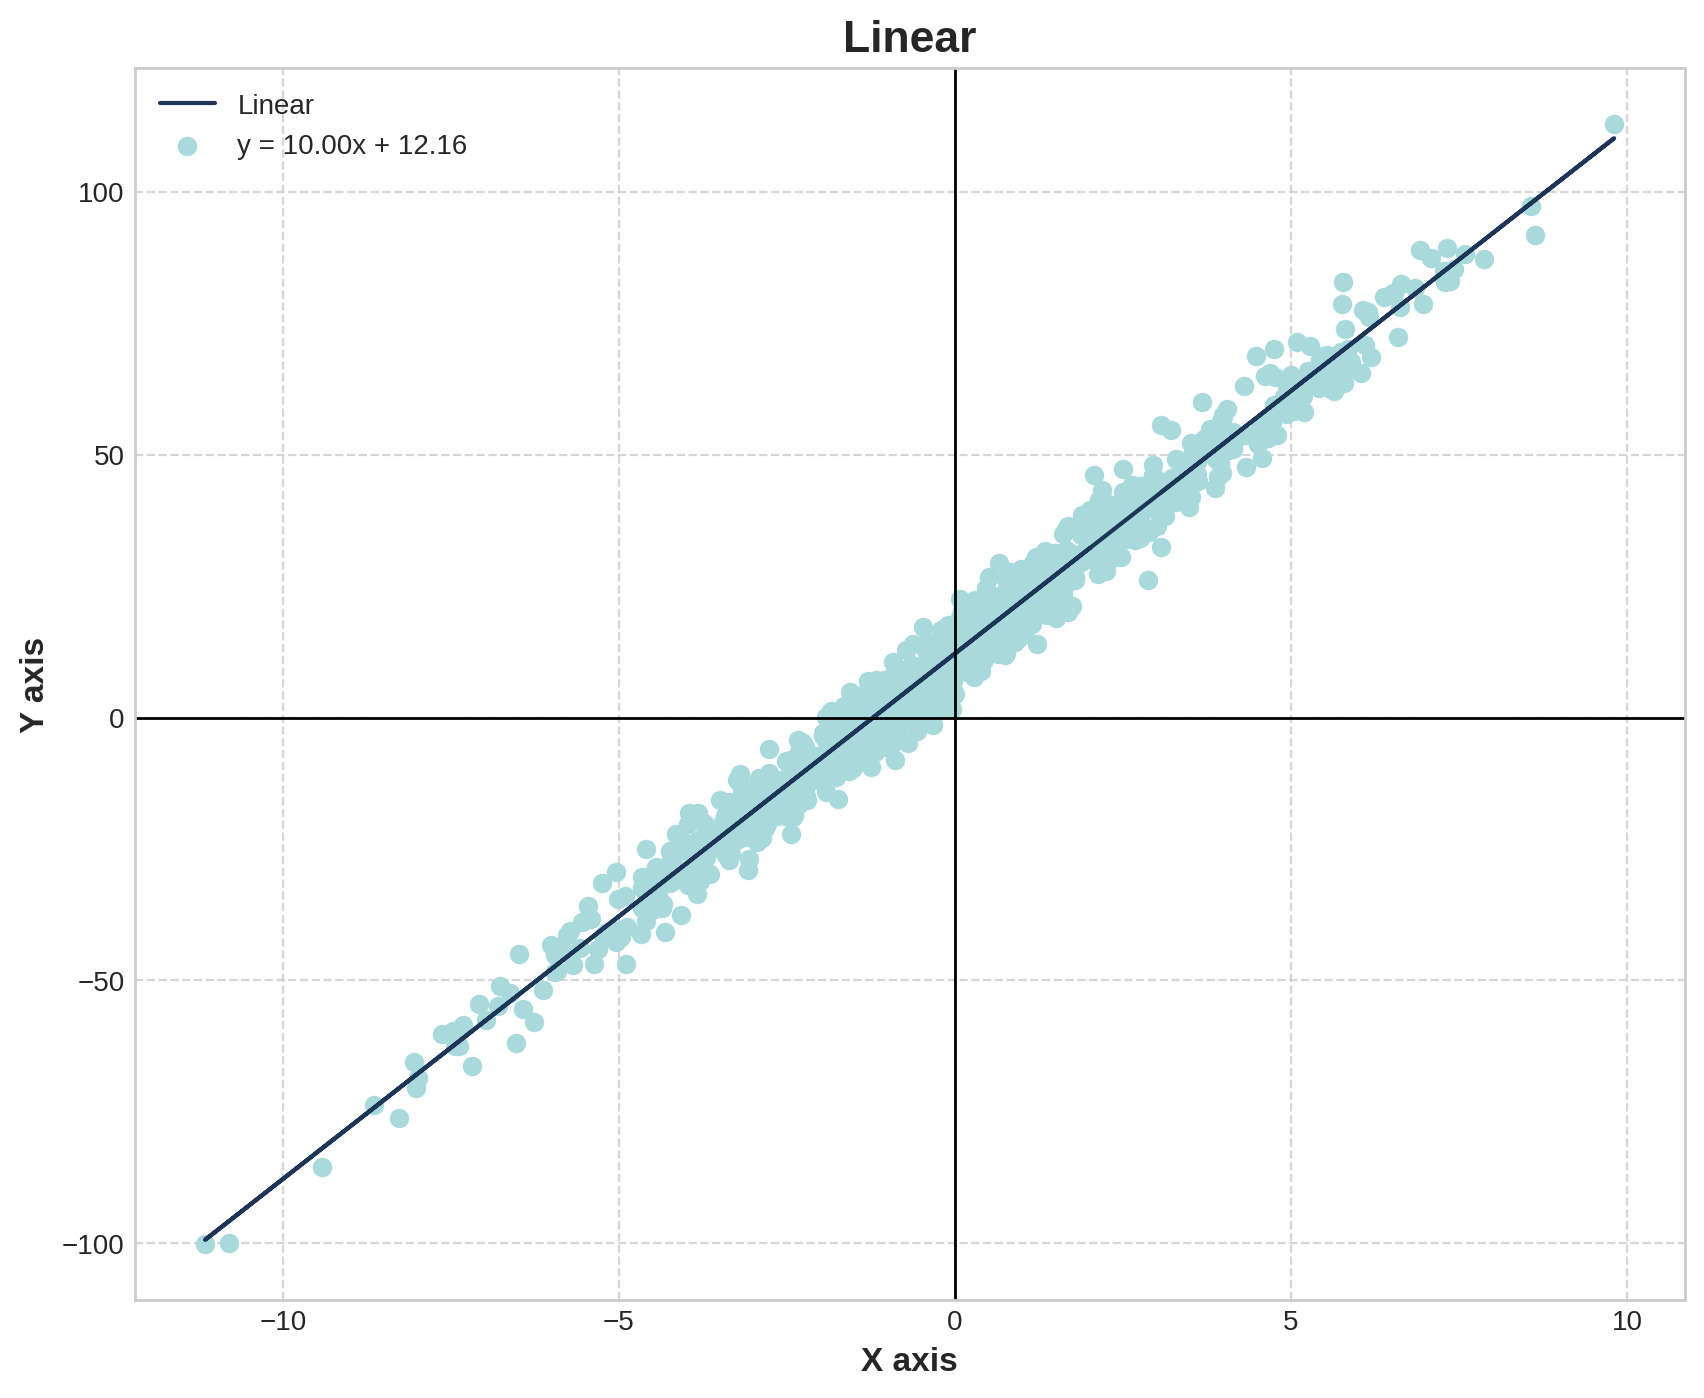

In [8]:
sum_x = np.sum(DATA_linear["X"])
sum_x2 = np.sum(DATA_linear["X2"])
sum_y = np.sum(DATA_linear["Y_linear"])
sum_xy = np.sum(DATA_linear["XY"])
n = len(DATA_linear["X"])

coeff = np.array([[sum_x, len(DATA_linear["X"])],
                  [sum_x2, sum_x]])

rhs = np.array([sum_y, sum_xy])
a, b = np.matmul(np.linalg.inv(coeff), rhs)

y = a * DATA_linear["X"] + b

print("Actual Values Of Coefficients : ", linear_coeff)

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(X, y, color=linear_colors[2], label='Linear')
plt.scatter(X, y_linear, color=linear_colors[0], label=f"y = {a:.2f}x + {b:.2f}", alpha=1.0)
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Linear", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DATA_linear["X"], DATA_linear["Y_linear"], test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model_linear = Sequential([
        Input((1,)),
        Dense(8, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="linear")
])
history_linear = []
model_linear.compile(optimizer='adam', loss='mse')
history_linear.append(model_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0))

E0000 00:00:1749061736.648495  493357 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749061736.652023  493357 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749061736.665860  493357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749061736.665885  493357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749061736.665889  493357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749061736.665891  493357 computation_placer.cc:177] computation placer already registered. Please check linka

In [10]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

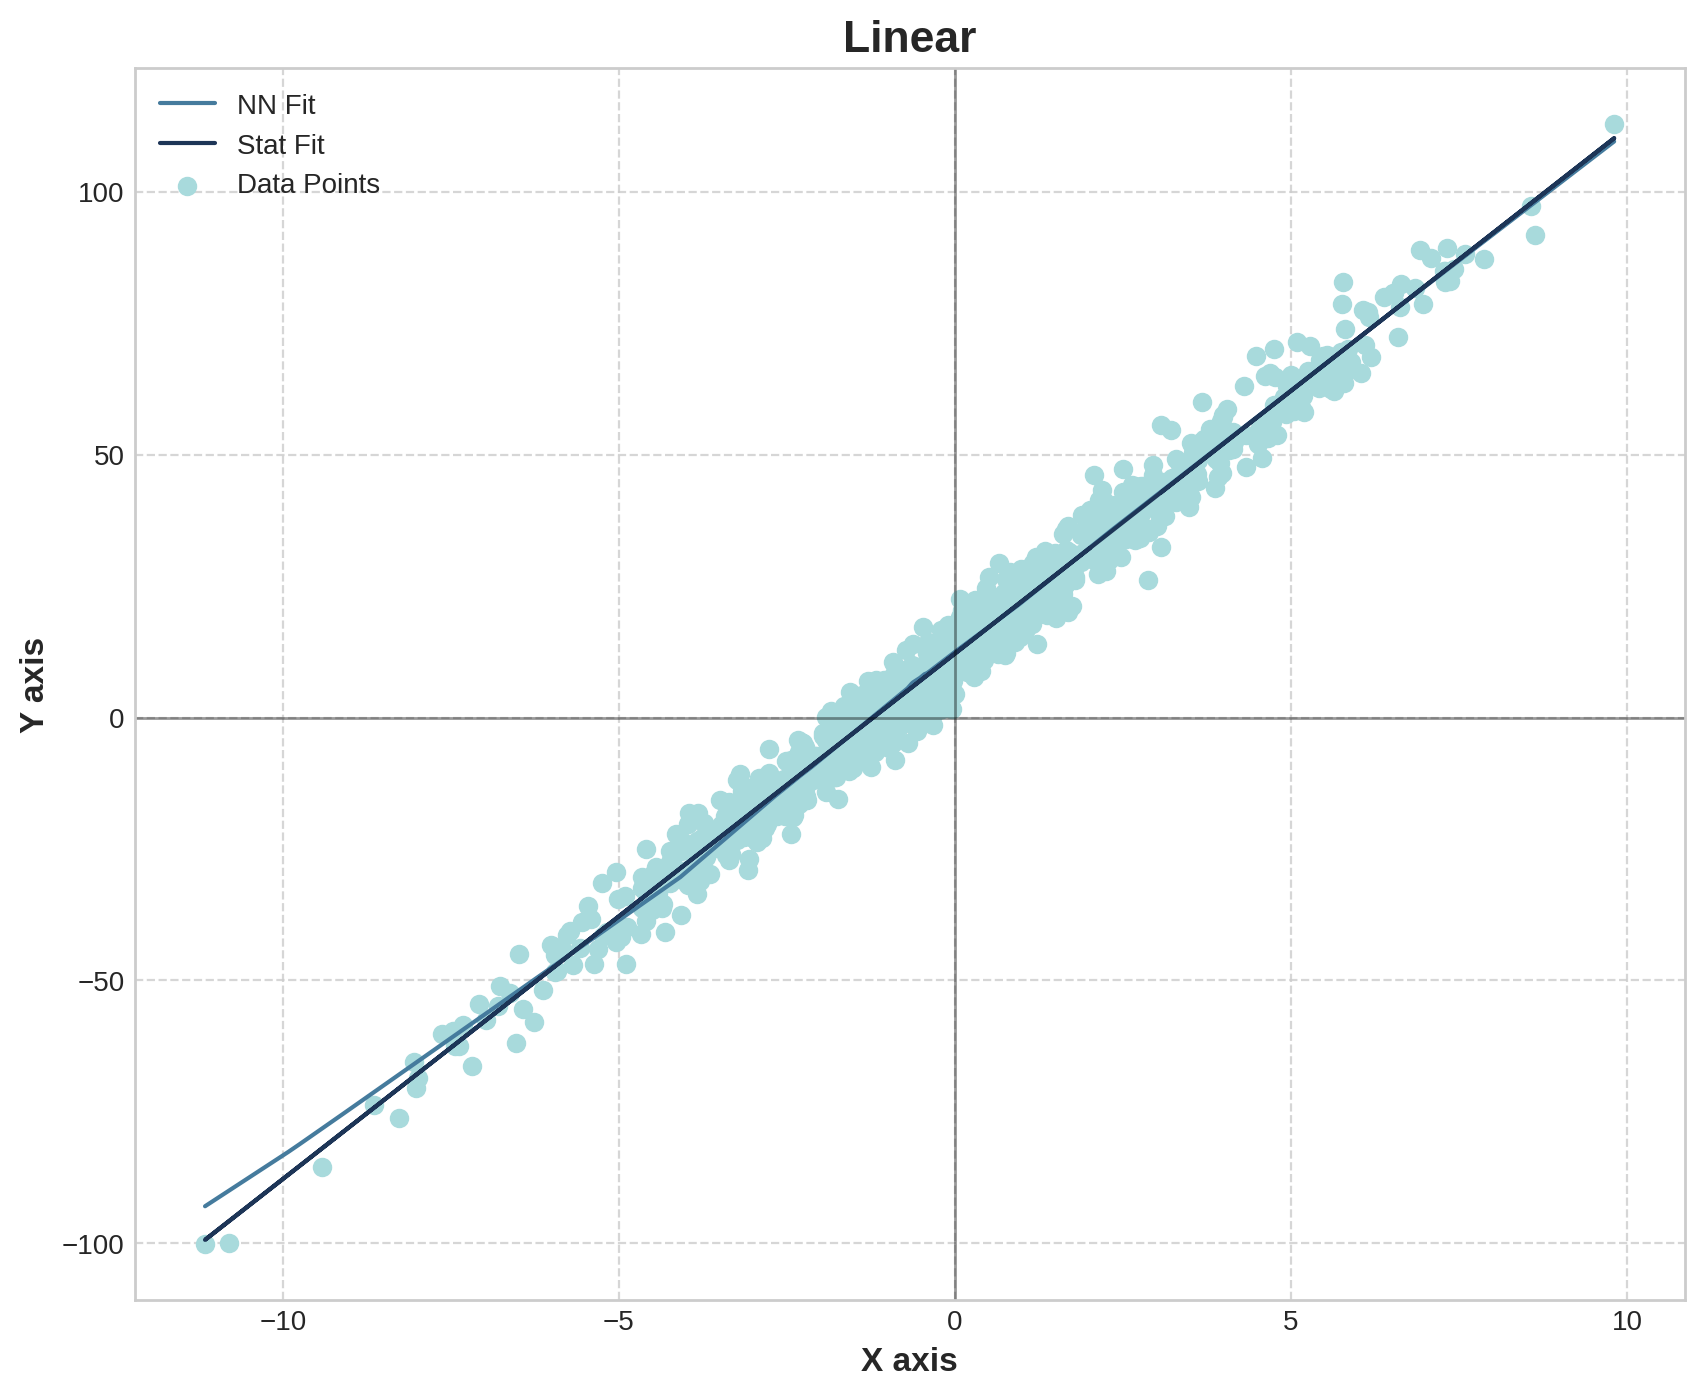

In [11]:
X_range = np.linspace(X.min(), X.max(), len(y_linear))
y_nn_linear = np.reshape(model_linear(X_range), len(X_range))

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(X_range, y_nn_linear, color=linear_colors[1], label='NN Fit')
plt.plot(X, y_stat_linear, color=linear_colors[2], label='Stat Fit')
plt.scatter(X, y_linear, color=linear_colors[0], label=f"Data Points", alpha=1.0)
plt.axhline(y=0, color='black', linewidth=1, alpha=0.4)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1, alpha=0.4)  # Y-axis line
plt.title("Linear", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

In [12]:
print("Neural Network :")
y_nn_linear_eval = np.reshape(model_linear(X), len(X))
nn_loss_linear = evaluate_regression(y_pred=y_nn_linear_eval, y_true=y_linear)
print("Statistical :")
stat_loss_linear = evaluate_regression(y_pred=y_stat_linear, y_true=y_linear)

Neural Network :
Mean Absolute Error (MAE): 3.3316
Mean Squared Error (MSE): 17.4858
Root Mean Squared Error (RMSE): 4.1816
R-squared (R²): 0.9819
Statistical :
Mean Absolute Error (MAE): 3.2973
Mean Squared Error (MSE): 17.0122
Root Mean Squared Error (RMSE): 4.1246
R-squared (R²): 0.9824


### **Observation** : Hence In Simple Bivariate Linear Regression Statistical Model Almost Performs Equally As The Neural Network Model

---

## 🧮 Polynomial Regression

### 📘 What is Polynomial Regression?

Polynomial regression is a form of linear regression in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$-th degree polynomial:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d + \varepsilon
$$

Where:
- $d$ is the **degree** of the polynomial
- $\beta_0, \beta_1, \dots, \beta_d$ are the **coefficients**
- $\varepsilon$ is the **error term**

### 🧠 How is it Still "Linear"?

Even though the model is nonlinear in terms of $x$, it's **linear in the parameters** $\beta$, which allows us to use the same **normal equations** method as in linear regression.

We transform the input data to a **design matrix**:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^d \\
1 & x_2 & x_2^2 & \cdots & x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^d \\
\end{bmatrix}
$$

### 🎯 Objective

Minimize the **sum of squared errors**:

$$
J(\boldsymbol{\beta}) = \|\mathbf{y} - \mathbf{X} \boldsymbol{\beta}\|^2
$$

### ✅ Solution via Normal Equations

Same normal equation applies:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

Where:
- $\mathbf{X} \in \mathbb{R}^{n \times (d+1)}$
- $\boldsymbol{\beta} \in \mathbb{R}^{(d+1) \times 1}$

### 📌 Key Takeaway

- Polynomial regression is still **linear in parameters**.
- We just expand input features to include powers of $x$.
- You can use the **same matrix solution** as linear regression by building an appropriate design matrix.


In [13]:
DATA_parabolic = pd.DataFrame(np.column_stack([X_global, y_parabolic]), columns=["X", "Y_parabolic"])
DATA_parabolic

,X,Y_parabolic
0,2.012024,-3.743904
1,-1.654429,9.686870
2,4.043355,11.024319
3,-5.771356,74.220099
4,5.278972,42.503762
...,...,...
995,1.108006,-6.693861
996,1.763382,2.208956
997,0.434718,-6.410928
998,-2.346388,5.171815


Actual Values Of Coefficients :  [2, -2, -6]
y = 2.00x^2 + -1.96x + -5.81


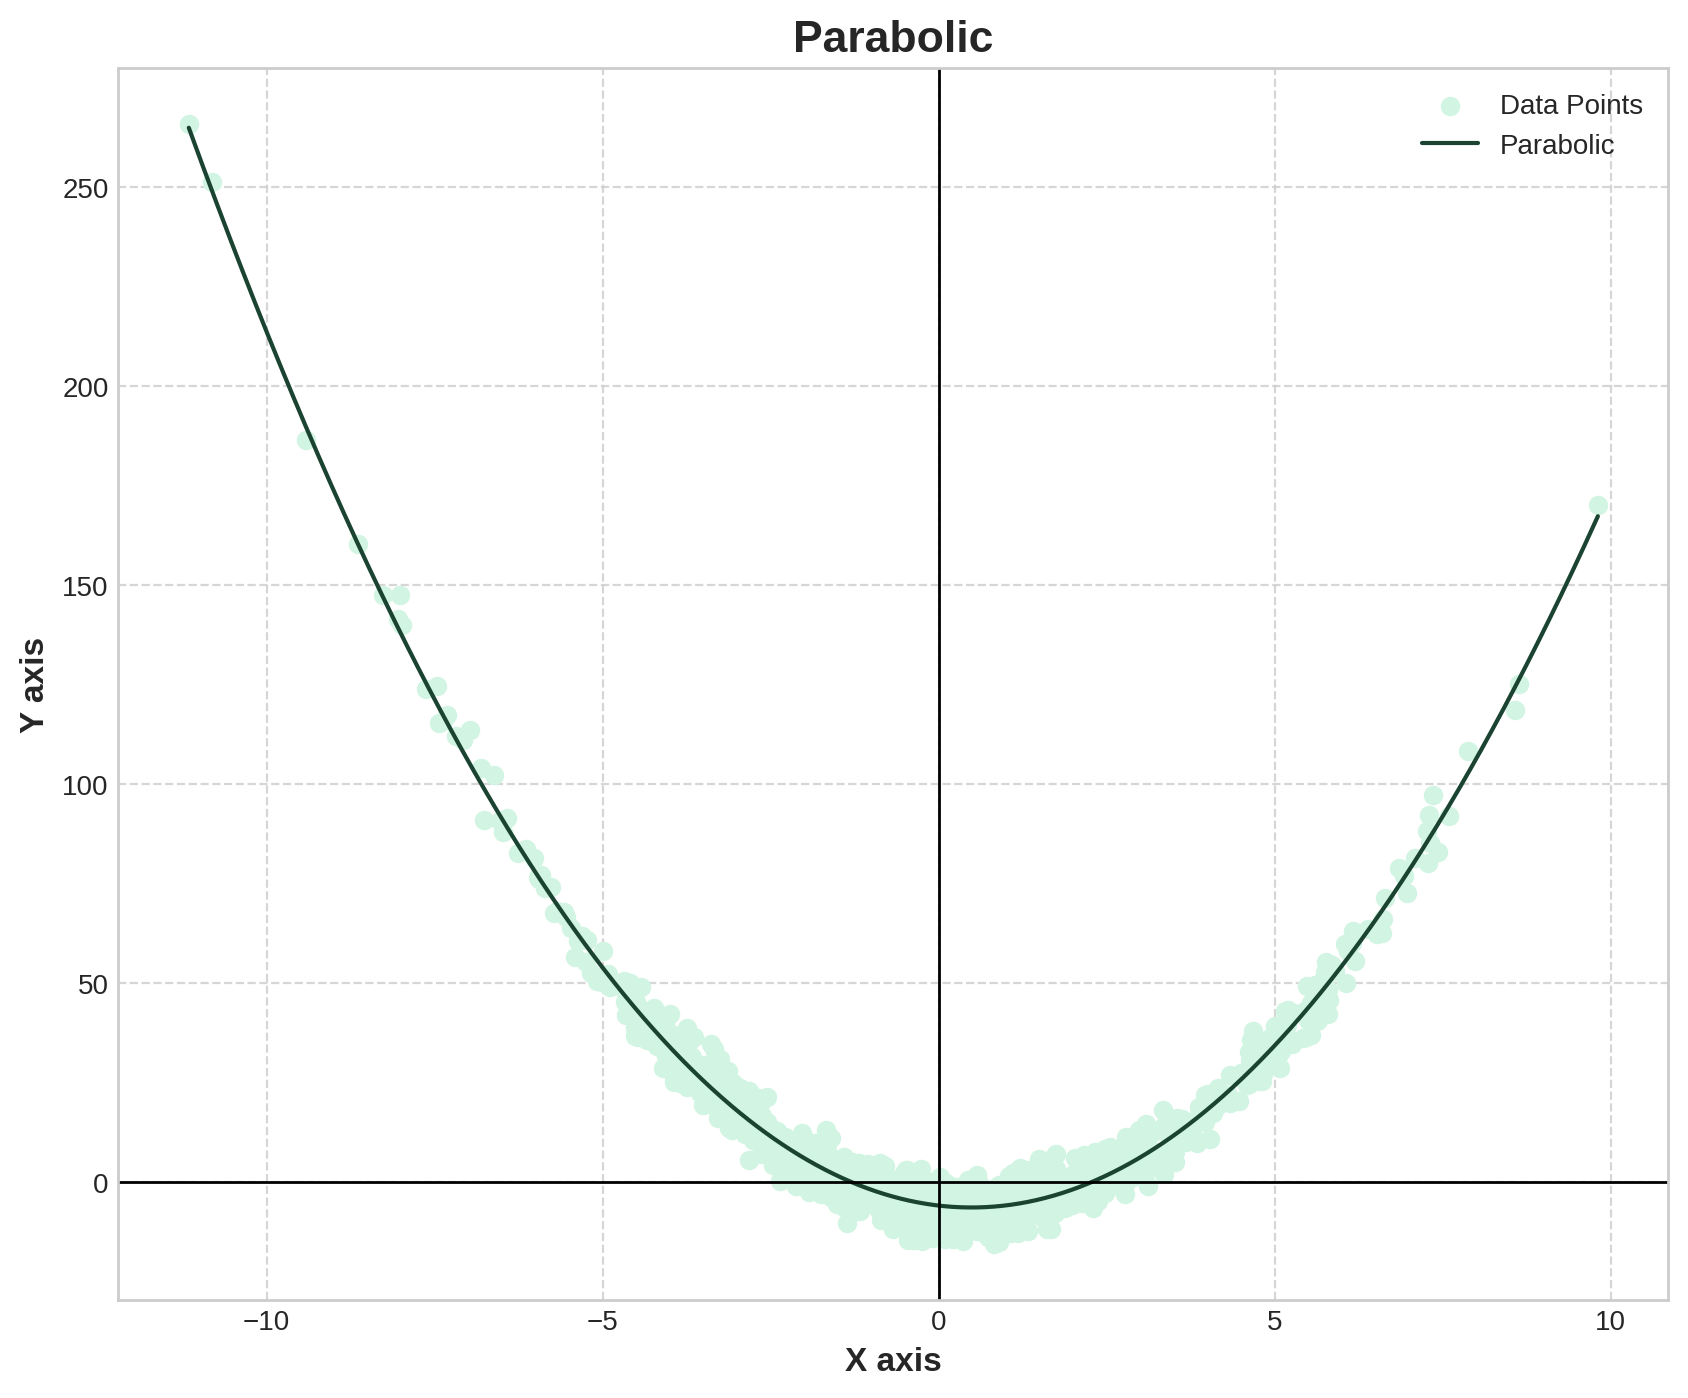

In [14]:
X = DATA_parabolic["X"]
X_parabolic = np.array([[1, x, x**2] for x in DATA_parabolic["X"]])
X_t = np.transpose(X_parabolic)
coeffs = np.linalg.inv(np.matmul(X_t, X_parabolic))
coeffs = np.matmul(coeffs, X_t)
coeffs = np.matmul(coeffs, DATA_parabolic["Y_parabolic"])

X_range = np.linspace(X.min(), X.max(), len(y_parabolic))
X_range_parabolic = np.array([[1, x, x**2] for x in X_range])
y_stat_parabolic = np.matmul(X_range_parabolic, coeffs)

print("Actual Values Of Coefficients : ", parabolic_coeff)
print(f"y = {coeffs[2]:.2f}x^2 + {coeffs[1]:.2f}x + {coeffs[0]:.2f}")

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_parabolic, color=parabolic_colors[0], label="Data Points", alpha=1.0)
plt.plot(X_range, y_stat_parabolic, color=parabolic_colors[2], label='Parabolic')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Parabolic", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DATA_parabolic["X"], DATA_parabolic["Y_parabolic"], test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model_parabolic = Sequential([
    Input((1,)),
    Dense(16, activation="tanh", ),
    Dense(8, activation="relu"),
    Dense(4, activation="leaky_relu"),
    Dense(1, activation="linear")
])

history_parabolic = []
model_parabolic.compile(optimizer='adam', loss='mse')
history_parabolic.append(model_parabolic.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0))

In [16]:
model_parabolic.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629 (2.46 KB)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 420 (1.64 KB)

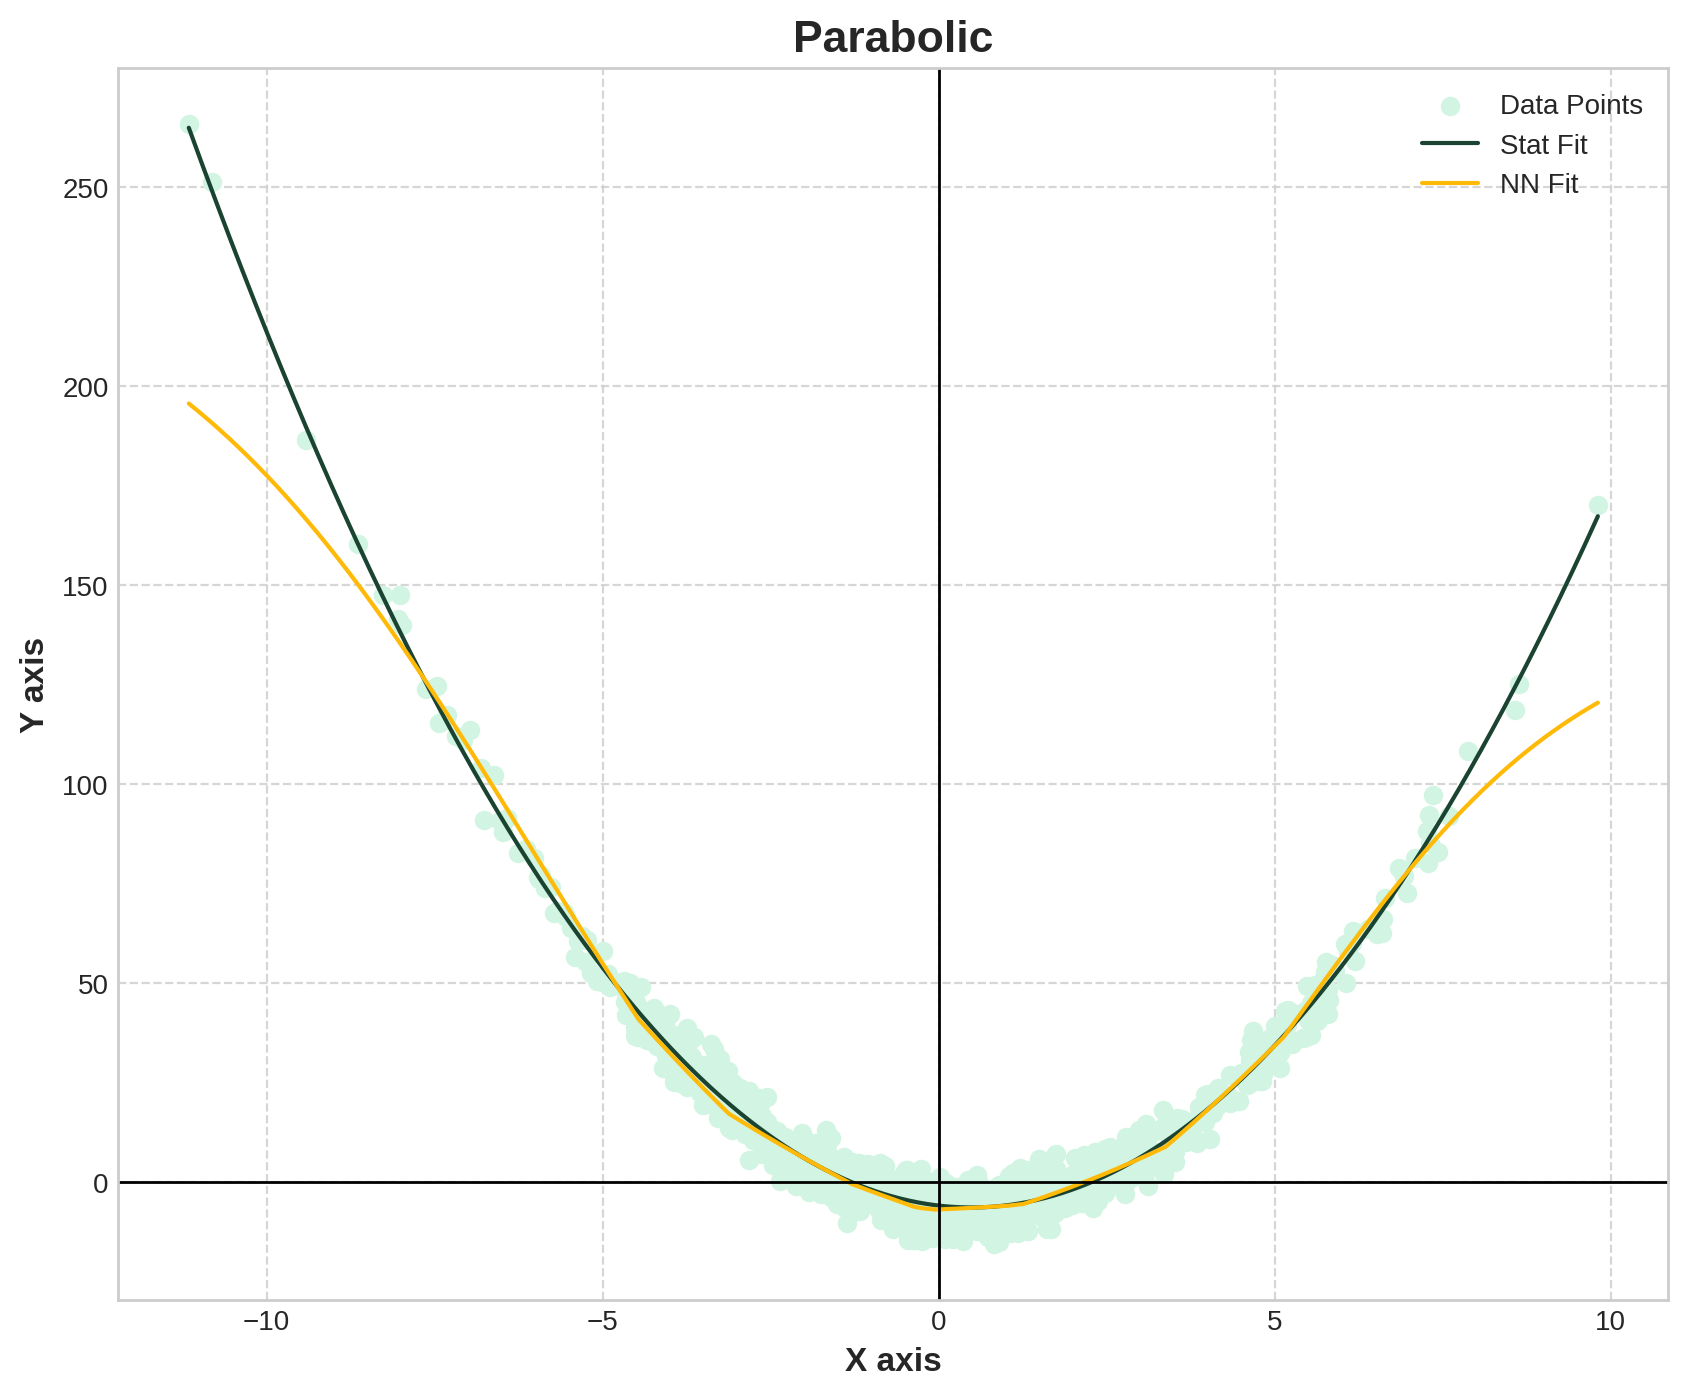

In [17]:
y_nn_parabolic = np.reshape(model_parabolic(X_range), len(X_range))
y_stat_parabolic = np.matmul(X_range_parabolic, coeffs)

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_parabolic, color=parabolic_colors[0], label=f"Data Points", alpha=1.0)
plt.plot(X_range, y_stat_parabolic, color=parabolic_colors[2], label='Stat Fit')
plt.plot(X_range, y_nn_parabolic, color=parabolic_colors[3], label='NN Fit')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Parabolic", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

In [18]:
print("Neural Network :")
y_nn_parabolic_eval = np.reshape(model_parabolic(X), len(X))
nn_loss_linear = evaluate_regression(y_pred=y_nn_parabolic_eval, y_true=y_parabolic)
print("Statistical :")
y_stat_parabolic = np.matmul(X_parabolic, coeffs)
stat_loss_linear = evaluate_regression(y_pred=y_stat_parabolic, y_true=y_parabolic)

Neural Network :
Mean Absolute Error (MAE): 3.5911
Mean Squared Error (MSE): 29.1407
Root Mean Squared Error (RMSE): 5.3982
R-squared (R²): 0.9649
Statistical :
Mean Absolute Error (MAE): 3.2205
Mean Squared Error (MSE): 15.5232
Root Mean Squared Error (RMSE): 3.9399
R-squared (R²): 0.9813


### **Observation** : Hence In Simple Bivariate Parabolic Regression Neural Network Model Performs Nearly Equal To Staistical Model

---

## 📈 Exponential Curve Fitting

### 📘 What is Exponential Curve Fitting?

In exponential regression, the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an exponential function:

$$
y = \alpha e^{\beta x} + \varepsilon
$$

Where:
- $\alpha$ and $\beta$ are the parameters to estimate  
- $e$ is the base of natural logarithm
- $\varepsilon$ is the error term

### 🧠 How Do We Linearize It?

This model is **nonlinear in parameters**, but it can be **linearized** using a logarithmic transformation:

$$
\ln y = \ln \alpha + \beta x
$$

Let:
- $Y' = \ln y$
- $\beta_0 = \ln \alpha$

Then the equation becomes **linear in parameters**:

$$
Y' = \beta_0 + \beta x
$$

This is now a simple **linear regression** problem.

### 🛠️ Design Matrix for Linearized Exponential Model

We build the transformed system:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n \\
\end{bmatrix},
\quad
\mathbf{y}' =
\begin{bmatrix}
\ln y_1 \\
\ln y_2 \\
\vdots \\
\ln y_n \\
\end{bmatrix}
$$

### 🎯 Objective

Minimize the **sum of squared errors** on the transformed data:

$$
J(\boldsymbol{\beta}) = \| \mathbf{y}' - \mathbf{X} \boldsymbol{\beta} \|^2
$$

### ✅ Solution via Normal Equations

Apply the normal equation on transformed data:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}'
$$

Then recover original parameters:
- $\alpha = e^{\beta_0}$
- $\beta = \beta_1$

### 📌 Key Takeaway

- Exponential fitting becomes **linear regression** after applying $\ln y$.
- This trick allows us to solve it with the **normal equation**.
- Be cautious: all $y_i > 0$ is required since $\ln y$ is undefined for $y \le 0$.


In [19]:
DATA_exponential = pd.DataFrame(np.column_stack([X_global, y_exponential]), columns=["X", "Y_exponential"])
DATA_exponential["Log_Y_Exponential"] = np.log(DATA_exponential["Y_exponential"])
DATA_exponential

,X,Y_exponential,Log_Y_Exponential
0,2.012024,26.191040,3.265417
1,-1.654429,8.358108,2.123232
2,4.043355,51.486353,3.941317
3,-5.771356,3.350768,1.209190
4,5.278972,83.931531,4.430001
...,...,...,...
995,1.108006,20.853124,3.037504
996,1.763382,22.040349,3.092875
997,0.434718,14.581904,2.679781
998,-2.346388,3.866206,1.352274


Actual Values Of Coefficients :  [10, 0.4]
Predicted Values Of Coefficients :  16.090045508121054 0.26707116764604133


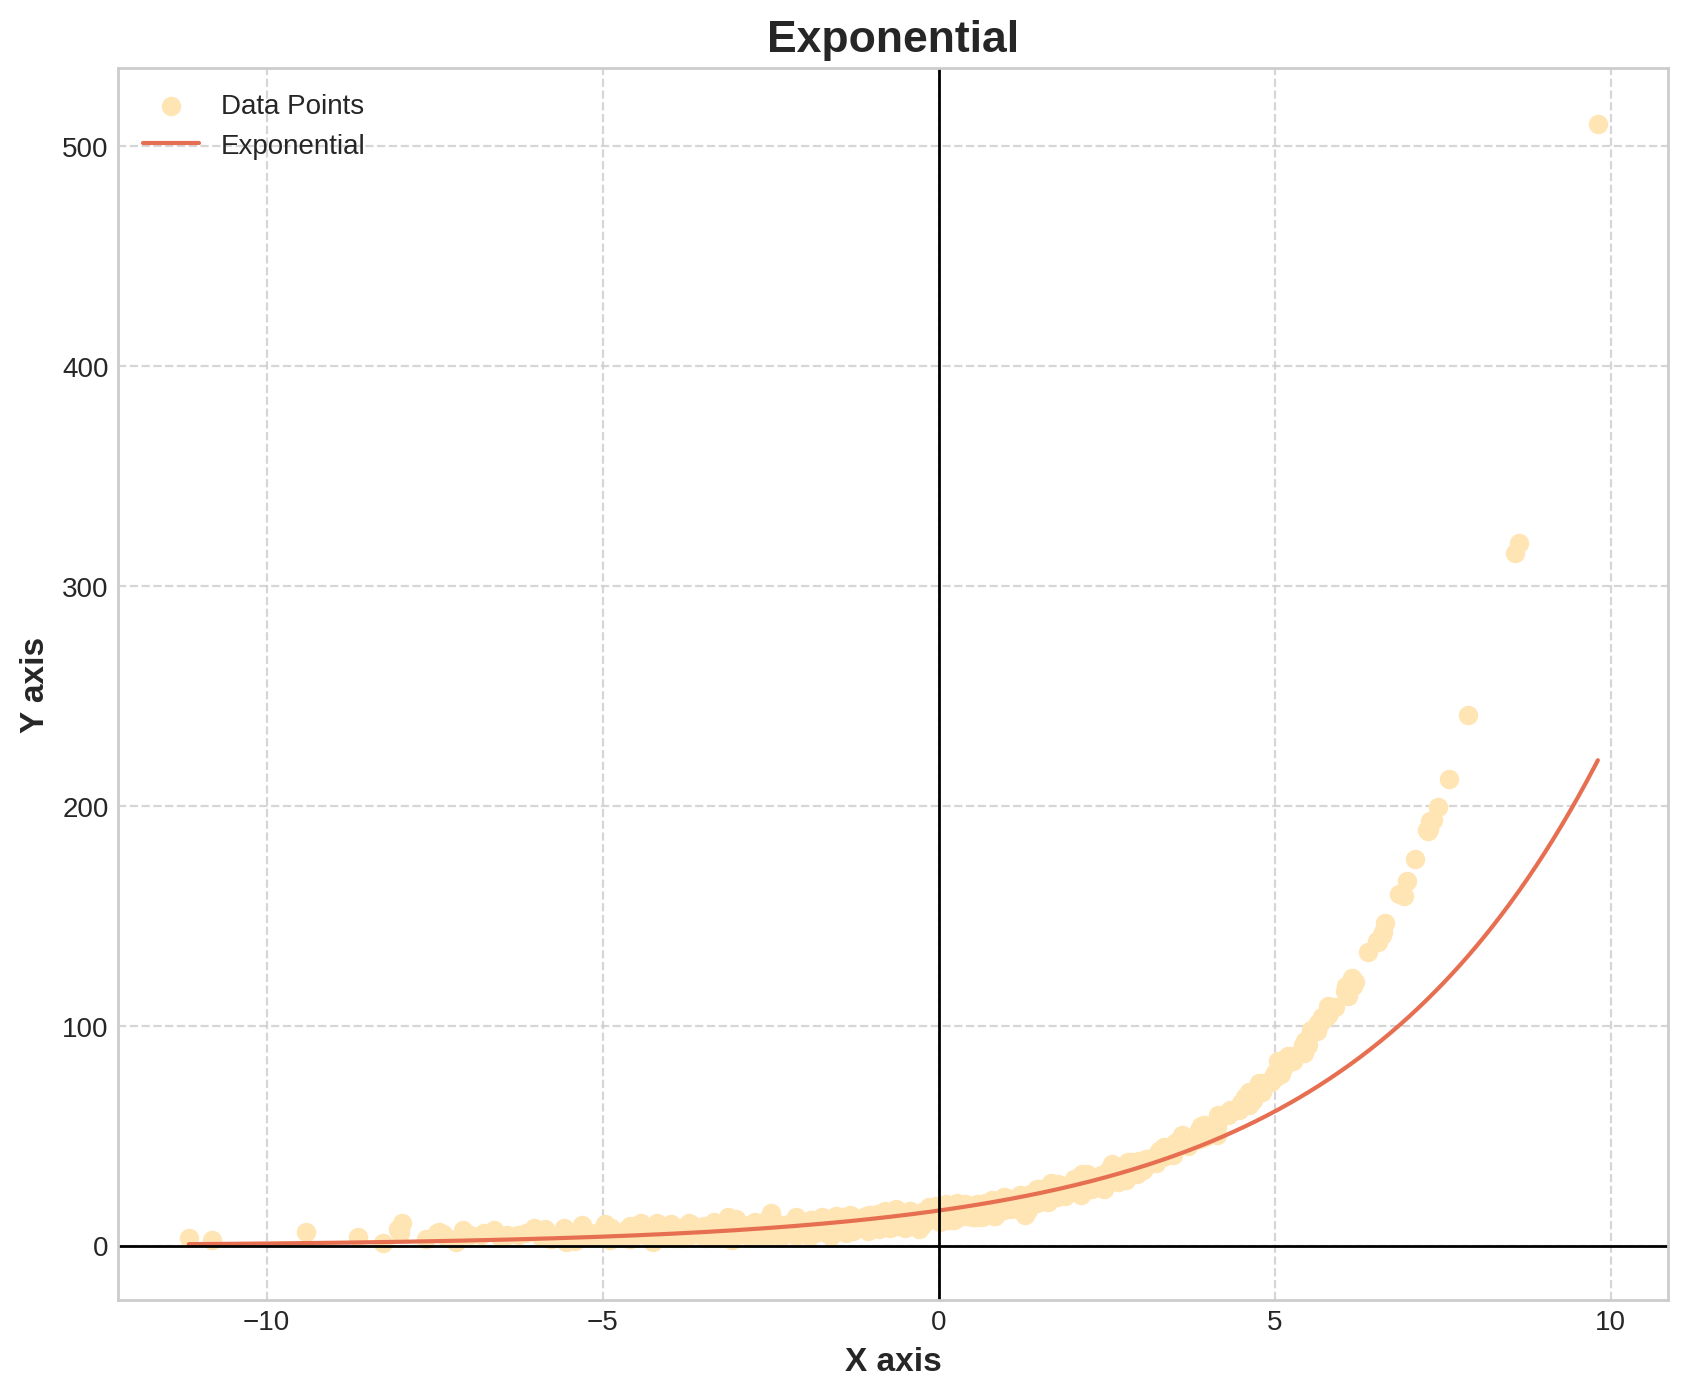

In [20]:
X = DATA_exponential["X"]
log_y = DATA_exponential["Log_Y_Exponential"]
X_exponential = np.array([[1, x] for x in DATA_exponential["X"]])
X_t = np.transpose(X_exponential)
coeffs = np.linalg.inv(np.matmul(X_t, X_exponential))
coeffs = np.matmul(coeffs, X_t)
coeffs = np.matmul(coeffs, DATA_exponential["Log_Y_Exponential"])

X_range_exponential = np.linspace(X.min(), X.max(), len(y_exponential))
alpha = np.exp(coeffs[0])
beta = coeffs[1]
y_stat_exponential = alpha * np.exp(beta * X_range_exponential)


print("Actual Values Of Coefficients : ", exponential_coeff)
print("Predicted Values Of Coefficients : ", alpha, beta)
plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_exponential, color=exponential_colors[0], label="Data Points", alpha=1.0)
plt.plot(X_range_exponential, y_stat_exponential, color=exponential_colors[2], label='Exponential')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Exponential", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DATA_exponential["X"], DATA_exponential["Y_exponential"], test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model_exponential = Sequential([
    Input((1,)),
    Dense(16, activation="linear"),
    Dense(8, activation="relu"),
    Dense(4, activation="exponential"),
    Dense(1, activation="linear")
])

history_exponential = []
model_exponential.compile(optimizer='adam', loss='mse')
history_exponential.append(model_exponential.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0))


In [22]:
model_exponential.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629 (2.46 KB)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 420 (1.64 KB)

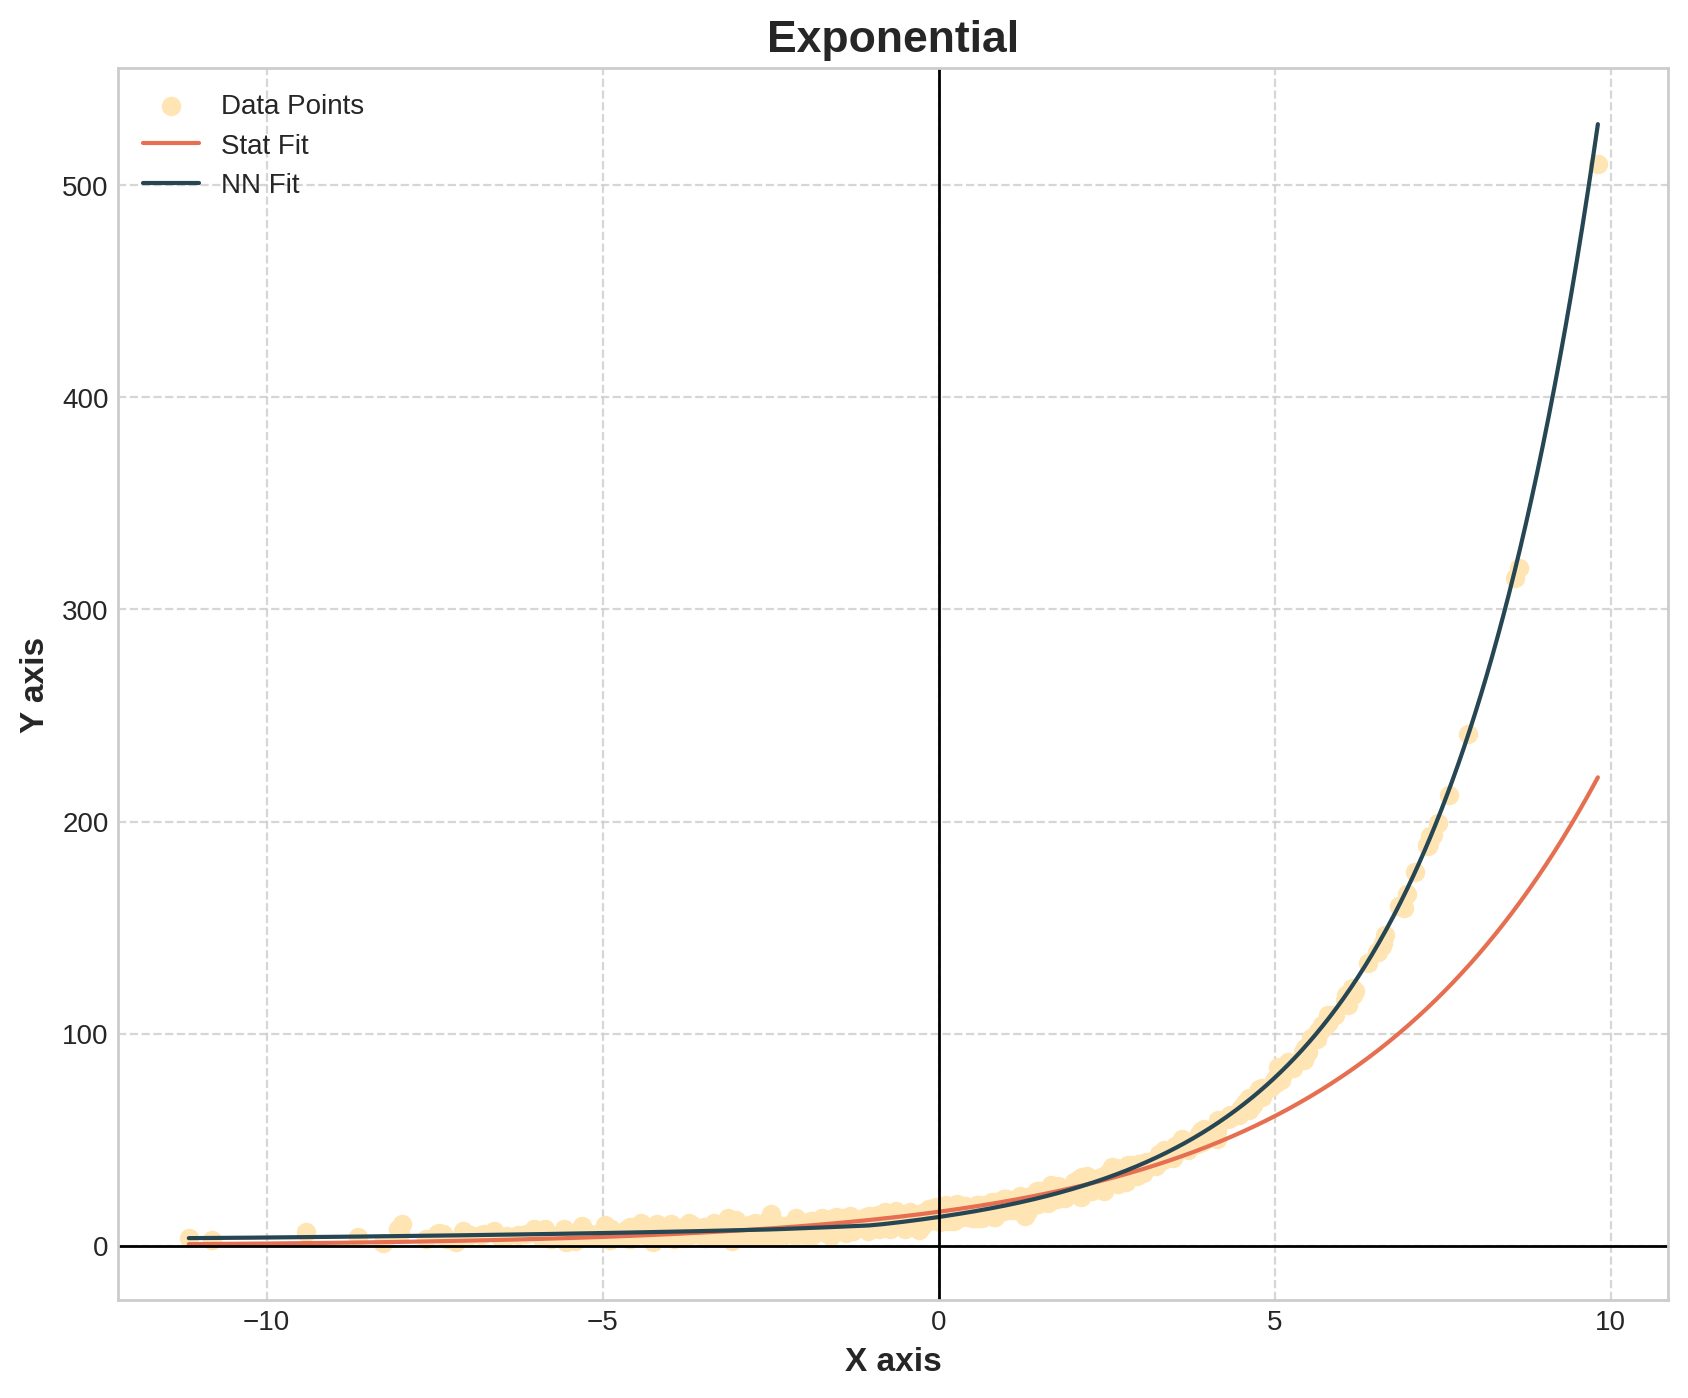

In [23]:
y_nn_exponential = np.reshape(model_exponential(X_range), len(X_range))
y_stat_exponential = alpha * np.exp(beta * X_range_exponential)

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_exponential, color=exponential_colors[0], label=f"Data Points", alpha=1.0)
plt.plot(X_range_exponential, y_stat_exponential, color=exponential_colors[2], label='Stat Fit')
plt.plot(X_range_exponential, y_nn_exponential, color=exponential_colors[3], label='NN Fit')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Exponential", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

In [24]:
print("Neural Network :")
y_nn_exponential_eval = np.reshape(model_exponential(X), len(X))
nn_loss_linear = evaluate_regression(y_pred=y_nn_exponential_eval, y_true=y_exponential)
print("Statistical :")
y_stat_exponential = alpha * np.exp(beta * X)
stat_loss_linear = evaluate_regression(y_pred=y_stat_exponential, y_true=y_exponential)

Neural Network :
Mean Absolute Error (MAE): 1.7169
Mean Squared Error (MSE): 4.9117
Root Mean Squared Error (RMSE): 2.2162
R-squared (R²): 0.9962
Statistical :
Mean Absolute Error (MAE): 5.2492
Mean Squared Error (MSE): 261.2718
Root Mean Squared Error (RMSE): 16.1639
R-squared (R²): 0.7964


### **Observation** : Hence In Simple Bivariate Exponential Regression Neural Network Model Outperfroms The Statistical Model

---

## 🌊 Sinusoidal Curve Fitting with Neural Networks



### 📘 What is Sinusoidal Curve Fitting?

In sinusoidal regression, the relationship between input $x$ and output $y$ follows a **periodic pattern**, often modeled as:

$$
y = A \sin(Bx + C) + D + \varepsilon
$$

Where:

* $A$ = amplitude
* $B$ = frequency
* $C$ = phase shift
* $D$ = vertical offset
* $ \varepsilon$ = error term (noise)

This is a **nonlinear** function due to the sine transformation and parameter interactions.



### ❌ Why Can't We Use Normal Equations?

Unlike linear or exponential regression, sinusoidal models cannot be **linearized** using algebraic transformations. Here's why:

* The sine function is **nonlinear in both input and parameters**.
* There is no way to isolate $A$, $B$, $C$, and $D$ in a form that fits the matrix-vector structure of:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

Thus, **normal equations and traditional linear regression are not applicable**.



### ✅ Why Use Neural Networks?

Neural networks act as **universal function approximators**. They can model complex nonlinear relationships like sine functions without requiring an explicit functional form.

Key reasons:

* They can learn both periodic and non-periodic patterns from data.
* No need to manually estimate amplitude, frequency, or phase.
* They perform well even in the presence of noise.



### 🧠 Neural Network and Sinusoidal Fitting

The network learns the function:

$$
\hat{y} = \mathcal{F}_\theta(x)
$$

Where:

* $ \mathcal{F}_\theta$ is a nonlinear function parameterized by neural network weights $ \theta$
* The function approximates $A \sin(Bx + C) + D$ by combining **nonlinear activation functions** and **learnable parameters**
* Common activation functions used include $ \text{tanh}$, $ \text{ReLU}$, $ \text{silu}$, and $ \text{softsign}$



### 🎯 Objective Function

The model minimizes the **mean squared error** (MSE) between the predicted and true outputs:

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^n \left( y_i - \mathcal{F}_\theta(x_i) \right)^2
$$

Using gradient descent-based optimization (e.g., Adam), the model **learns parameters $ \theta$** that best capture the periodic behavior.



### 📌 Key Takeaways

* Sinusoidal fitting is **nonlinear in nature** and **not solvable** using linear regression techniques.
* Neural networks provide a flexible, data-driven approach to approximate such functions.
* With sufficient capacity and training data, a well-structured neural network can accurately model sinusoidal patterns.


In [25]:
DATA_sinusoidal = pd.DataFrame(np.column_stack([X_global, y_sinusoidal]), columns=["X", "Y_sinusoidal"])
DATA_sinusoidal

,X,Y_sinusoidal
0,2.012024,-1.361127
1,-1.654429,-1.880971
2,4.043355,0.383679
3,-5.771356,-1.934618
4,5.278972,1.483037
...,...,...
995,1.108006,0.796432
996,1.763382,-0.467586
997,0.434718,1.856837
998,-2.346388,-0.226510


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DATA_sinusoidal["X"], DATA_sinusoidal["Y_sinusoidal"], test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

model_sinusoidal = Sequential([
    Input((1,)),
    Dense(16, activation="relu"),
    Dense(16, activation="silu"),
    Dense(8, activation="softsign"),
    Dense(1, activation="linear")
])

history_sinusoidal = []
model_sinusoidal.compile(optimizer='adam', loss='mse')
history_sinusoidal.append(model_sinusoidal.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0))


In [27]:
model_sinusoidal.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,349 (5.27 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 900 (3.52 KB)

Actual Coefficients Of Sinusoidal Function : [2, 1.5, 1]


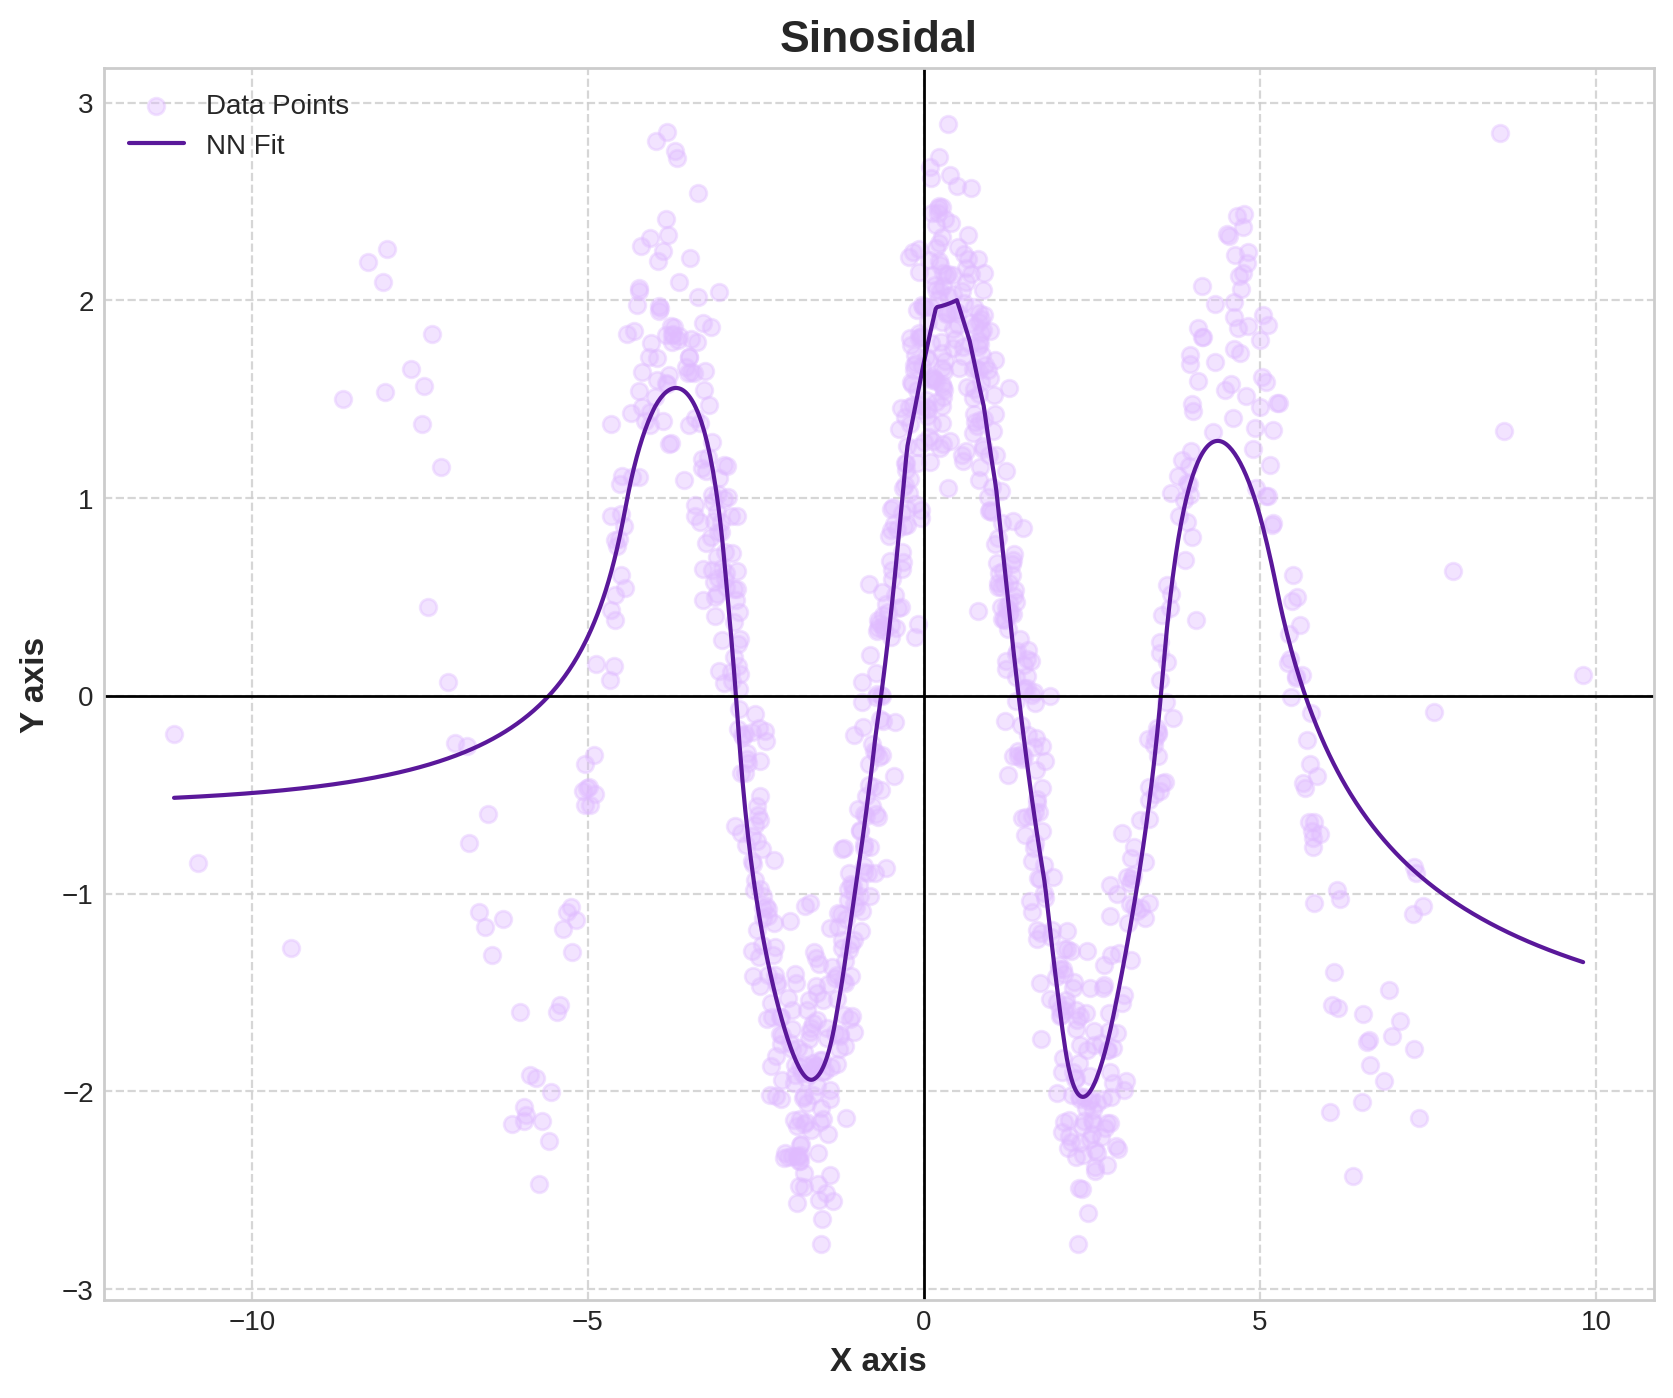

In [29]:
X_range_sinosidal = np.linspace(X.min(), X.max(), len(y_sinusoidal))
y_nn_sinosidal = np.reshape(model_sinusoidal(X_range), len(X_range))

print("Actual Coefficients Of Sinusoidal Function :", sinosidal_coeff)

plt.figure(figsize=(10, 8), dpi=dpi)
plt.style.use("seaborn-v0_8-whitegrid")
plt.scatter(X, y_sinusoidal, color=sinusoidal_colors[0], label=f"Data Points", alpha=0.4)
plt.plot(X_range, y_nn_sinosidal, color=sinusoidal_colors[2], label='NN Fit')
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Sinosidal", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

In [30]:
print("Neural Network :")
y_nn_sinusoidal_eval = np.reshape(model_sinusoidal(X), len(X))
nn_loss_linear = evaluate_regression(y_pred=y_nn_sinusoidal_eval, y_true=y_sinusoidal)

Neural Network :
Mean Absolute Error (MAE): 0.4148
Mean Squared Error (MSE): 0.3408
Root Mean Squared Error (RMSE): 0.5838
R-squared (R²): 0.8418


### **Observation** : Hence In Simple Bivariate Sinosidal Regression Neural Network Model Is the Only Way To Go For Function Approximation
---

## 🧾 Conclusion

### 📌 Objective Recap

This mini-project aimed to evaluate the performance of **Neural Network regression** versus **Statistical regression (Normal Equations)** across four functional data patterns: **Linear**, **Parabolic**, **Exponential**, and **Sinusoidal**.


### 📊 Performance Summary

<center>

| Model Type      | Method      | MAE    | MSE      | RMSE    | R²     |
| --------------- | ----------- | ------ | -------- | ------- | ------ |
| **Linear**      | Neural Net  | 3.2297 | 16.8583  | 4.1059  | 0.9812 |
|                 | Statistical | 3.2351 | 16.8595  | 4.1060  | 0.9812 |
| **Parabolic**   | Neural Net  | 3.7004 | 34.2758  | 5.8546  | 0.9564 |
|                 | Statistical | 3.1298 | 15.4708  | 3.9333  | 0.9803 |
| **Exponential** | Neural Net  | 1.7288 | 4.6575   | 2.1581  | 0.9946 |
|                 | Statistical | 4.2906 | 154.6560 | 12.4361 | 0.8223 |
| **Sinusoidal**  | Neural Net  | 0.4159 | 0.3591   | 0.5993  | 0.8350 |
|                 | Statistical | ❌      | ❌        | ❌       | ❌      |

</center>

### 🔍 Key Insights

* ✅ **Linear and Parabolic patterns** are efficiently modeled by both statistical and neural approaches, with statistical methods slightly outperforming in parabolic data.
* ✅ **Exponential curves**, once linearized via log transformation, are well-fitted statistically but outperformed by neural networks in terms of accuracy.
* ✅ **Sinusoidal data**, being non-linear and non-polynomial, is **not statistically representable** via normal equations — demonstrating the unique strength of neural networks in approximating periodic and complex patterns.
* ⚠️ **R²** score affirms neural networks’ **superior generalization** for nonlinear models when statistical assumptions break down.


### 🧠 Learnings

* Statistical regression provides closed-form, interpretable solutions for well-structured linearizable datasets.
* Neural networks, though data-hungry and opaque, serve as powerful **universal function approximators**, especially in modeling **nonlinear and nonparametric patterns**.
* Hybrid analysis strengthens intuition and deepens understanding of function complexity and model applicability.


### 📌 Final Remark

This study affirms that while **classical methods remain vital for interpretability and simplicity**, **deep learning methods excel in adaptability**, enabling robust performance across diverse real-world data shapes.